> # # **PROYECTO: RECOMENDACIÓN DE PRODUCTOS BANCARIOS A CLIENTES**

![](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Santander_Argentina_Logo.png/1200px-Santander_Argentina_Logo.png)


**Link a GitHub:** 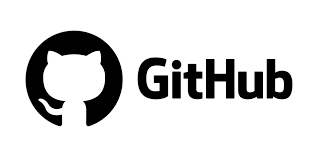

**https://github.com/GonzalezMaristany/Proyecto-Recomendacion-de-productos-bancarios**

> # **Sección 6: DASARROLANDO UN MODELO DE MACHINE LEARNING**
![](https://cdn-icons-png.flaticon.com/512/2103/2103652.png)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Tratamiento de datos
import numpy as np                    
import pandas as pd
from prettytable import PrettyTable
import warnings
# Gráficos
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split #para separar en train y test
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
# Modelos de Clasificacion:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
import xgboost 
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('¡Librerías importadas con éxito!')

/kaggle/input/santander-product-recommendation/test_ver2.csv.zip
/kaggle/input/santander-product-recommendation/sample_submission.csv.zip
/kaggle/input/santander-product-recommendation/train_ver2.csv.zip
¡Librerías importadas con éxito!


In [7]:
#Lectura de dataset (archivo csv)
clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)
# Muestra de las diez primeras filas del dataset
clientes.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


> **Limpieza de nulos**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoANHyQoQEO-vvL7KOkisWsVBvhBIAmDbydWuBeLk7Oc3v1TENE-h79JZQ_BZuT3CmY7Q&usqp=CAU)

In [8]:
# columnas conyuemp y ult_fec_cli_1t
clientes.drop(['conyuemp', 'ult_fec_cli_1t'],axis=1, inplace=True)
# columna renta
clientes.loc[clientes["renta"].isnull(),"renta"] = np.nanmedian(clientes.renta)
# columna segmento
clientes.loc[clientes["segmento"].isnull(),"segmento"] = '02 - PARTICULARES'
# columna canal_entrada
clientes.loc[clientes["canal_entrada"].isnull(),"canal_entrada"] = 'KHE'
# columna indrel_1mes
clientes["indrel_1mes"] = clientes["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
# columna tiprel_1mes
clientes.loc[clientes["tiprel_1mes"].isnull(),"tiprel_1mes"] = 'I'
# columna nomprov
clientes.loc[clientes["nomprov"].isnull(),"nomprov"] = 'MADRID'
# columna cod_prov
clientes.drop(['cod_prov'],axis=1, inplace=True)
# columna sexo
clientes.loc[clientes["sexo"].isnull(),"sexo"] = 'V'
# columna tipodom
clientes.drop(['tipodom'],axis=1, inplace=True)
#columna indfall
clientes["indfall"].fillna('N', inplace=True)
# columna indext
clientes["indext"].fillna('N', inplace=True)
# columna ind_actividad_cliente
clientes["ind_actividad_cliente"].fillna(0.0, inplace=True)
# columna indresi
clientes["indresi"].fillna('S', inplace=True)
# columna indrel
clientes["indrel"].fillna(1.0, inplace=True)
# columna ind_nuevo
clientes["ind_nuevo"].fillna(0.0, inplace=True)
# columna fecha_alta
cust_ids = clientes[clientes.fecha_alta.isnull()]['ncodpers']
tmp = clientes[clientes.ncodpers.isin(cust_ids)].groupby(['ncodpers', 'fecha_dato']).size().to_frame()
tmp.reset_index(level=[0,1], inplace=True)
tmp.columns=['ncodpers', 'fecha_dato','Count']
tmp.drop(columns='Count', inplace=True)
tmp = tmp.join(tmp.groupby('ncodpers')['fecha_dato'].agg(['min', 'max']), on='ncodpers')
tmp.drop(['fecha_dato'], axis = 1, inplace=True)
tmp.drop_duplicates(keep='first', inplace=True)
tmp.rename(index=str, columns={"ncodpers": "ncodpers", "min": "Min_fecha_dato", "max":"Max_fecha_dato"}, inplace=True)
# columna fecha_alta
clientes = clientes.merge(tmp, on='ncodpers', how = 'outer')
clientes.loc[clientes.fecha_alta.isnull(), 'fecha_alta'] = clientes.Min_fecha_dato
clientes.drop(columns=['Min_fecha_dato', 'Max_fecha_dato'], inplace=True)
# columna pais_residencia
clientes.loc[clientes["pais_residencia"].isnull(),"pais_residencia"] = 'ES'
# columna ind_empleado
clientes.loc[clientes["ind_empleado"].isnull(),"ind_empleado"] = "N"
# columnas ind_nomina_ult1 y ind_nom_pens_ult1
clientes["ind_nomina_ult1"].fillna(0.0, inplace=True)
clientes["ind_nom_pens_ult1"].fillna(0.0, inplace=True)

In [9]:
#se exporta a csv el dataset limpio
clientes.to_csv('clientes_limpio.csv',header=True,index=False)


**TRANSFORMACIÓN DE LOS DATOS**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQE1caNP74mF0LDe06F6GamNL0kF_YSLtvk2w&usqp=CAU)

In [3]:
clientes_limpio=pd.read_csv('clientes_limpio.csv', header=0)
clientes_limpio.info()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  indrel_1mes            int64  
 11  tiprel_1mes            object 
 12  indresi                object 
 13  indext                 object 
 14  canal_entrada          object 
 15  indfall                object 
 16  nomprov                object 
 17  ind_actividad_cliente  float64
 18  renta                  float64
 19  segmento               object 
 20  ind_ahor_fin_ult1      int64  
 21  ind_aval_fin_ult1      int64  
 22  ind_cco_fin_ult1

**TRANSFORMAMOS LA COLUMNA AGE**

In [4]:
#columna age
clientes_limpio['age'] = pd.to_numeric(clientes_limpio.age, errors='coerce')
grupo_edad = clientes_limpio['age'].value_counts()
len_unique = len(grupo_edad)
print("Número de valores únicos de edad de los clientes : ",len_unique)
print("Mayor edad de los clientes : ", np.max(clientes_limpio.age))
print("Menor edad de los clientes : ", np.min(clientes_limpio.age))
print("Edad promedio de los clientes : ", np.mean(clientes_limpio.age))

Número de valores únicos de edad de los clientes :  120
Mayor edad de los clientes :  164.0
Menor edad de los clientes :  2.0
Edad promedio de los clientes :  40.18146491355274


**El Dataset incluye valores atípicos en la columna edad. Por lo tanto se eliminan los datos correspondientes a edad <15 y edad>100 ya que no recomendaremos ningún paquete de producto para alguien cuya edad este en dichos rangos.**

In [5]:
#columna age
clientes_limpio = clientes_limpio[((clientes_limpio["age"] > 15) & (clientes_limpio["age"] < 100))]

**Ahora eliminamos las columnas (ind_ahor_fin_ult1 e ind_aval_fin_ult1) porque tienen menos posibilidades de ser elegidos entre los 7 mejores productos recomendados porque, como se vio anteriormente en la sección de exploración y visualización de datos, ningún cliente adoptó estos 2 productos.**

In [6]:
#columnas ind_ahor_fin_ult1 e ind_aval_fin_ult1
clientes_limpio.drop(columns=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],inplace = True)

**TRANSFORMAMOS LAS COLUMNAS fecha_dato, fecha_alta y antiguedad**

In [7]:
#variable fecha_dato
clientes_limpio['fecha_dato'] = clientes_limpio['fecha_dato'].replace('-','',regex=True).str.strip(' ,')
clientes_limpio['fecha_dato'] = clientes_limpio['fecha_dato'].astype("float64")
#variable fecha_alta
clientes_limpio['fecha_alta'] = clientes_limpio['fecha_alta'].replace('-','',regex=True).str.strip(' ,')
clientes_limpio['fecha_alta'] = clientes_limpio['fecha_alta'].astype("float64")
#variable antiguedad
clientes_limpio["antiguedad"] = pd.to_numeric(clientes_limpio["antiguedad"],errors = 'coerce')

**TRANSFORMAMOS COLUMNAS CATEGÓRICAS A NUMÉRICAS CON LABELENCODER** 

In [8]:
cat_columns = clientes_limpio.select_dtypes(include='object').columns

In [17]:
cat_columns

Index(['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento'],
      dtype='object')

In [ ]:
lista = [] 
#loop por columnas categóricas
for col in cat_columns:
  info = (col, clientes_limpio[col].nunique(), clientes_limpio[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,ind_empleado,5,"[N, A, B, F, S]"
1,pais_residencia,118,"[ES, CA, US, CH, CL, IE, AT, NL, FR, GB, DE, D..."
2,sexo,2,"[H, V]"
3,tiprel_1mes,5,"[A, I, P, R, N]"
4,indresi,2,"[S, N]"
5,indext,2,"[N, S]"
6,canal_entrada,162,"[KHL, KHE, KHD, KFA, KFC, KAT, KAZ, RED, KHC, ..."
7,indfall,2,"[N, S]"
8,nomprov,52,"[MALAGA, CIUDAD REAL, ZARAGOZA, TOLEDO, LEON, ..."
9,segmento,3,"[02 - PARTICULARES, 03 - UNIVERSITARIO, 01 - TOP]"


In [9]:
from sklearn.preprocessing import OrdinalEncoder

#generacion del encoder 
le = OrdinalEncoder(handle_unknown='use_encoded_value' , #use cuando tenes valores desconocidos 
                    unknown_value=-1) # asignacion a valores desconocidos 

# generacion de numeros por cada categorico 
le.fit(clientes_limpio[cat_columns])

#transformacion de las categoricas en train dataset
clientes_limpio[cat_columns] = le.transform(clientes_limpio[cat_columns])

In [10]:
clientes_limpio.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


> **5.4 LIMPIEZA DE OUTLIERS**
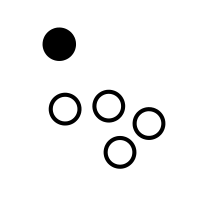

**Con Isolation Forest identificamos los outliers del dataset, establecemos un umbral de contaminación de 0,05.**

In [11]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05) 
K =iso.fit_predict(clientes_limpio)
K

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([ 1,  1,  1, ...,  1,  1, -1])

**Creamos una columna con los valores de los outliers**

In [12]:
clientes_limpio["outliers"] = K
clientes_limpio

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,outliers
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,20160528.0,1185013,3.0,36.0,1.0,53.0,20160514.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647305,20160528.0,1168909,3.0,36.0,1.0,43.0,20130823.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647306,20160528.0,1173729,3.0,36.0,0.0,33.0,20130909.0,1.0,1,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647307,20160528.0,1164094,3.0,36.0,0.0,54.0,20160513.0,0.0,32,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1


**Eliminamos las filas cuyo valor en la columna "outliers" es -1**

In [13]:
clientes_limpio = clientes_limpio.loc[clientes_limpio["outliers"] != -1, :]
clientes_limpio

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,outliers
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647303,20160528.0,1185110,3.0,36.0,1.0,22.0,20130927.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647304,20160528.0,1185013,3.0,36.0,1.0,53.0,20160514.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647305,20160528.0,1168909,3.0,36.0,1.0,43.0,20130823.0,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
13647306,20160528.0,1173729,3.0,36.0,0.0,33.0,20130909.0,1.0,1,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1


**Eliminamos la columna "outliers" ya que fue creada solo para identificar los mismos y no tiene sentido que el modelo la contemple como una variable.**

In [14]:
clientes_limpio = clientes_limpio.drop("outliers",1)   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [15]:
#conteo de nulos despues de limpieza y transformacion
clientes_limpio.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
i

In [16]:
clientes_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833144 entries, 0 to 13647307
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             float64
 1   ncodpers               int64  
 2   ind_empleado           float64
 3   pais_residencia        float64
 4   sexo                   float64
 5   age                    float64
 6   fecha_alta             float64
 7   ind_nuevo              float64
 8   antiguedad             int64  
 9   indrel                 float64
 10  indrel_1mes            int64  
 11  tiprel_1mes            float64
 12  indresi                float64
 13  indext                 float64
 14  canal_entrada          float64
 15  indfall                float64
 16  nomprov                float64
 17  ind_actividad_cliente  float64
 18  renta                  float64
 19  segmento               float64
 20  ind_cco_fin_ult1       int64  
 21  ind_cder_fin_ult1      int64  
 22  ind_cno_fin_ult1

In [17]:
#se exporta a csv el dataset limpio y transformado
clientes_limpio.to_csv('clientes_tratado.csv',header=True,index=False)

In [3]:
clientes_tratado=pd.read_csv('clientes_tratado.csv', header=0)
clientes_tratado.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,36.0,0.0,35.0,20150112.0,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


**6.1 SELECCION DE VARIABLES (FEATURE SELECTION)**
![](https://cdn-icons-png.flaticon.com/128/2893/2893657.png)

**Vamos a utilizar el método wrapper "Forward Selection" para identificar la mínima cantidad de variables que permitan clasificar si un cliente adquirirá el producto ind_cco_fin_ult1 (el cual es el producto más comprado según el análisis exploratorio de datos efectuado)**

In [4]:
import statsmodels.api as sm 

In [5]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

**Definimos las variables "X" y la variable "y"**

In [6]:
# split input y target

X = clientes_tratado.iloc[:,0:20] #variables independientes
y = clientes_tratado.iloc[:,20]    #target variable
print (X)
print(y)

          fecha_dato  ncodpers  ind_empleado  pais_residencia  sexo   age  \
0         20150128.0   1375586           3.0             36.0   0.0  35.0   
1         20150228.0   1375586           3.0             36.0   0.0  35.0   
2         20150328.0   1375586           3.0             36.0   0.0  35.0   
3         20150428.0   1375586           3.0             36.0   0.0  35.0   
4         20150528.0   1375586           3.0             36.0   0.0  35.0   
...              ...       ...           ...              ...   ...   ...   
12833138  20160528.0   1185110           3.0             36.0   1.0  22.0   
12833139  20160528.0   1185013           3.0             36.0   1.0  53.0   
12833140  20160528.0   1168909           3.0             36.0   1.0  43.0   
12833141  20160528.0   1173729           3.0             36.0   0.0  33.0   
12833142  20160528.0   1164094           3.0             36.0   0.0  54.0   

          fecha_alta  ind_nuevo  antiguedad  indrel  indrel_1mes  tiprel_1m

In [7]:
forward_selection(data=X,target=y,significance_level=0.01)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: Depr

['sexo',
 'segmento',
 'ind_nuevo',
 'age',
 'indext',
 'indrel',
 'canal_entrada',
 'ind_actividad_cliente',
 'fecha_alta',
 'fecha_dato',
 'indrel_1mes',
 'tiprel_1mes',
 'ncodpers',
 'indresi',
 'renta',
 'indfall',
 'ind_empleado',
 'nomprov']

**Definimos un nuevo dataset con los varlores que arrojó el Forward Selection.**

In [4]:
clientes_tratado.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

In [5]:
clientes_tratado.drop(columns=['pais_residencia', 'antiguedad','fecha_dato'],inplace = True)

In [6]:
#se exporta a csv el dataset 
clientes_tratado.to_csv('clientes_modelado.csv',header=True,index=False)

In [2]:
clientes_modelado=pd.read_csv('clientes_modelado.csv', header=0)
clientes_modelado.head()

,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,indrel,indrel_1mes,tiprel_1mes,indresi,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


> # **ENTRENANDO UN ALGORITMO DE CLASIFICACIÓN**
![](https://cdn-icons-png.flaticon.com/512/2857/2857379.png)

![](https://www.datatrained.com/post/wp-content/uploads/2022/03/Decision-Tree-vs-Random-Forest-3-scaled.jpg)

![](https://www.statology.org/wp-content/uploads/2021/08/decision1.png)

In [7]:
#Importamos las librerías a utilizar
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Función para crear las matrices de confusión y no repetir el código.
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Compra', 'No compra'], yticklabels=['Compra', 'No compra'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
     

> # **RANDOM FOREST**

In [10]:
clientes_modelado.columns

Index(['ncodpers', 'ind_empleado', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta',
       'segmento', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

In [12]:
#Random Forest
#Seperamos en X e y
#Preparación de datos para el modelado
X = clientes_modelado.iloc[:,0:17] #variables independientes
y = clientes_modelado.iloc[:,17:39]    #target variable
print(X)
print(y)

          ncodpers  ind_empleado  sexo   age  fecha_alta  ind_nuevo  indrel  \
0          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
1          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
2          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
3          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
4          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
...            ...           ...   ...   ...         ...        ...     ...   
12833139   1185110           3.0   1.0  22.0  20130927.0        1.0     1.0   
12833140   1185013           3.0   1.0  53.0  20160514.0        1.0     1.0   
12833141   1168909           3.0   1.0  43.0  20130823.0        1.0     1.0   
12833142   1173729           3.0   0.0  33.0  20130909.0        1.0     1.0   
12833143   1164094           3.0   0.0  54.0  20160513.0        0.0     1.0   

          indrel_1mes  tiprel_1mes  indresi  indext

**Para el planteamiento del modelo, realizamos un primer paso que es la división de los datos de entrenmaiento y de prueba. En este caso, el 70% de la base de datos se seleccionó para entrenar los modelos y el 30% como conjunto de prueba.**

In [13]:
#Separamos en train y test y nos quedamos 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
 #Creamos el modelo
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=70,criterion='gini')
clf.fit(X_train, y_train)
     

RandomForestClassifier(max_depth=6, n_estimators=70, random_state=42)

In [15]:
# Obtenemos predicciones
y_pred= clf.predict(X_test)

In [16]:
#Imprimimos las predicciones
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83   2892259
           1       0.00      0.00      0.00      1356
           2       0.00      0.00      0.00    176073
           3       1.00      0.33      0.50     14166
           4       0.00      0.00      0.00     37146
           5       0.78      0.03      0.07    523062
           6       0.00      0.00      0.00    132669
           7       0.00      0.00      0.00      7216
           8       0.00      0.00      0.00      5900
           9       0.00      0.00      0.00    141825
          10       0.00      0.00      0.00    256193
          11       0.00      0.00      0.00     48587
          12       0.00      0.00      0.00     10509
          13       0.00      0.00      0.00     20466
          14       0.00      0.00      0.00     10191
          15       0.00      0.00      0.00    136697
          16       0.00      0.00      0.00     95502
          17       0.00    

In [17]:
clf.feature_importances_

array([1.34337366e-01, 6.47469789e-06, 3.97166419e-04, 7.59930198e-02,
       1.71517918e-01, 5.47028023e-03, 4.74637600e-04, 5.19431524e-04,
       1.22193159e-01, 1.93920437e-04, 6.28663775e-04, 1.18068820e-01,
       4.06916061e-05, 8.69057864e-03, 2.44337609e-01, 2.55210445e-03,
       1.14578160e-01])

Text(0.5, 0, 'Random Forest Feature Importance')

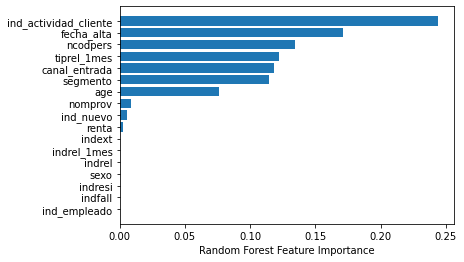

In [18]:
#Imprimimos un grafico de barras con las variables mas importantes (Random Forest)
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

> # **DECISION TREE**

In [3]:
#Seperamos en X e y
#Preparación de datos para el modelado
X = clientes_modelado.iloc[:,0:17] #variables independientes
y = clientes_modelado.iloc[:,17:39]    #target variable
print(X)
print(y)

          ncodpers  ind_empleado  sexo   age  fecha_alta  ind_nuevo  indrel  \
0          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
1          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
2          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
3          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
4          1375586           3.0   0.0  35.0  20150112.0        0.0     1.0   
...            ...           ...   ...   ...         ...        ...     ...   
12833139   1185110           3.0   1.0  22.0  20130927.0        1.0     1.0   
12833140   1185013           3.0   1.0  53.0  20160514.0        1.0     1.0   
12833141   1168909           3.0   1.0  43.0  20130823.0        1.0     1.0   
12833142   1173729           3.0   0.0  33.0  20130909.0        1.0     1.0   
12833143   1164094           3.0   0.0  54.0  20160513.0        0.0     1.0   

          indrel_1mes  tiprel_1mes  indresi  indext

In [5]:
#Separamos en train y test y nos quedamos 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
y_pred = model_dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.927568243029768

In [16]:
#todas las metricas en uno
y_pred = model_dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98   2892259
           1       0.96      0.94      0.95      1356
           2       0.90      0.87      0.88    176073
           3       0.99      0.97      0.98     14166
           4       0.90      0.83      0.86     37146
           5       0.99      0.99      0.99    523062
           6       0.98      0.98      0.98    132669
           7       0.53      0.39      0.45      7216
           8       0.93      0.89      0.91      5900
           9       0.92      0.91      0.91    141825
          10       0.95      0.95      0.95    256193
          11       0.95      0.95      0.95     48587
          12       0.98      0.97      0.98     10509
          13       0.98      0.97      0.98     20466
          14       0.99      0.99      0.99     10191
          15       0.96      0.96      0.96    136697
          16       0.85      0.78      0.81     95502
          17       0.96    